# Visualization tutorial

Author: 
[Sicheng He](https://sichenghe.github.io/) (sichengh@mit.edu)
(with contribution from [Vincent Meijer](https://lae.mit.edu/team/vincent-meijer/)).

Date: 08/28/2022 
Last edit: 10/13/2022

References:
* [Dumont: trees, maps, and theorems](https://www.principiae.be/book/pdfs/TM&Th-samplepages.pdf).

Related packages:
* `matplotlib`: a general purpose `python` plot package.
* `niceplots`: a usefule tool built on top of `matplotlib` that can do many formatting things to give a good start point for fine tuning.
* `cartopy`: 


## 1. General guideline

## 1.1 Purpose

Having data generated, collected, and analyzed is not the end of a scientific discovery process!
The message needs to be conveyed to the audience to make an impact. 
We need nice visualization to make this process effective.
This workshop will help you learn to tell whether a visualization is effective and how to generate effective visualization.

## 1.2 Questions to ask to guide visualization

Making good visuals requires significant **effort** and **creativity**! 
You need to answer the following questions to yourself:

* Q1: What is the message you want to convey (usually 1-3 pieces of message per figure)?
* Q2: What is the best way to make the message clear? 
* Q3: How to minimize communication noise? 

In this visualization workshop, we will constantly get back to these three questions.


## 2. Organization
We will cover 2 + 1 topics: 
* Curve plot
* Contour plot
* Advanced topic. 

For the curve and contour plot, you will have many opportunities to use them in your research.
Some of you will plot the figure for the advanced topic. 
It is recommended that you have a repo of figure templates that cover each type of the figures you will generate.
It will take a bit more time at the beginning, but it will ultimately save you a lot of time.


The tutorial follows one general process:
We will first show a default plot and work together to figure out why the visualization is not effective.
Then, we will generate a better plot.




## 3. Main
### 3.1 Curve plot
#### 3.1.1 Preparation

At first, import the required modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

Scenario: We have done a hypothetical structural oscillation experiment. 
The `yref` array stores the measured structural displacement at different times.
We employed two numerical methods to simulate the response, whose results are stored in the `y1` and `y2` arrays. We need to compare the two methods.

In [2]:
# x: time
x = np.linspace(0, 10, 100)

# y: position
# yref result from experiment
yref = np.sin(x + 0.5)

# y1 result from the first method
y1 = 1.3 * yref + 0.5 * np.cos(x)

# y2 result from the second method
y2 = 1.2 * yref + 1e-1 * np.cos(x)

#### 3.1.2 Default plot

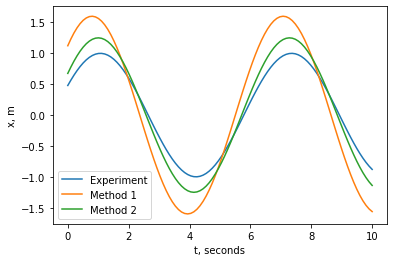

In [3]:
# Initialize the figure
fig, ax = plt.subplots()

# Lines and legends
ax.plot(x, yref, label = "Experiment")
ax.plot(x, y1, label = "Method 1")
ax.plot(x, y2, label = "Method 2")

# x, y labels
ax.set_ylabel('x, m')
ax.set_xlabel('t, seconds')

# plot
ax.legend()
plt.show()

The issues:
* I1: The major point of figure is that method 2 is better than method 1. 
* I2: Experimental data were obtained at individual points: this is not reflected properly by using smooth curves like shown here.
* I3: The legend is not so easy to read.
* I4: The y label difficult to read (rotate your head?).
* I5: Too many x, y ticks. Are they useful?
* I6: x, t are mathematical symbols probably pre-defined in the research script. 
* I7: Do the box lines on top and right do anything?
* I8: Make sure to save the figure in vector form.

### 3.1.3 A better figure

colors ['#e29400ff', '#1E90FF', '#E21A1A', '#00a650ff', '#800000ff', '#ff8f00', '#800080ff', '#00A6D6', '#000000ff']


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright


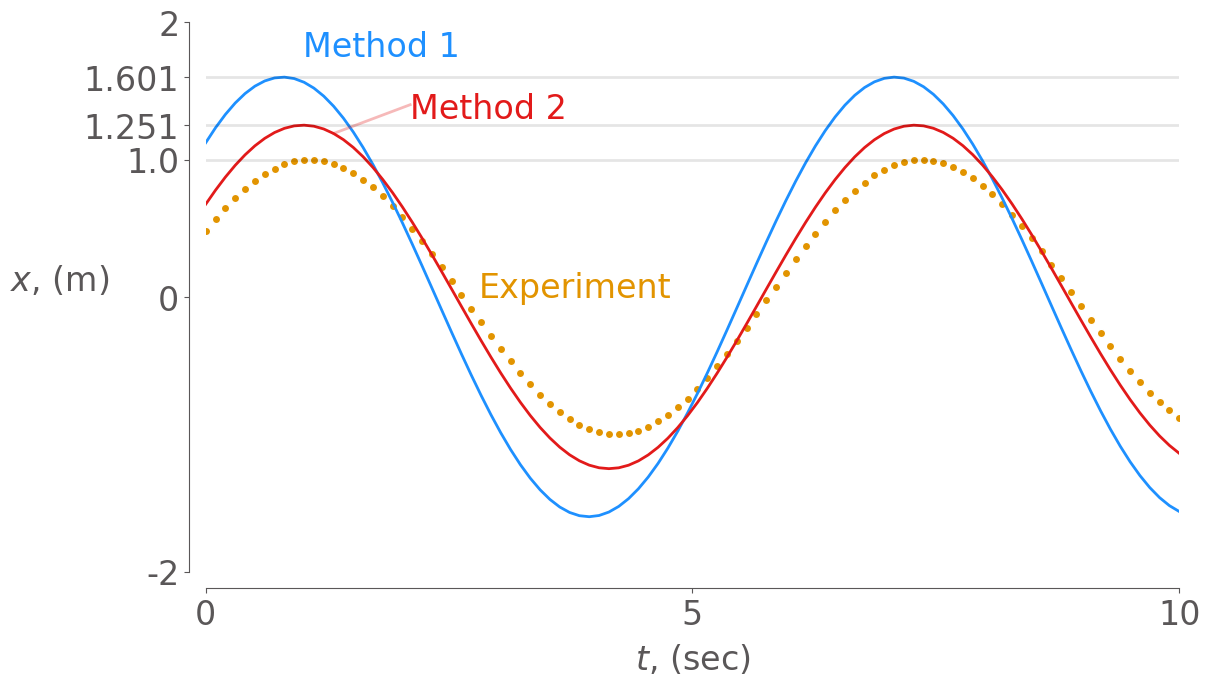

In [5]:
import niceplots

fig, ax = plt.subplots()

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
print("colors", colors)

# Applying niceplots standard
# Fix (I7) and in general makes the figure looks better
niceplots.setRCParams()
niceplots.All()
# If not using niceplots
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# Fix (I2)
ax.plot(x, yref, 'o')
ax.plot(x, y1)
ax.plot(x, y2)

# Fix (I4, I6)
ax.set_ylabel(r'$x$, (m)', rotation = 0)
ax.yaxis.set_label_coords(-.15, .5)
ax.set_xlabel(r'$t$, (sec)')

# Fix (I3)
ax.text(2.8, 0, "Experiment", color = colors[0])
ax.text(1, 1.75, "Method 1", color = colors[1])
ax.text(2.1, 1.3, "Method 2", color = colors[2])
ax.plot([x[13], 2.1], [y2[13], 1.4], '-', color = colors[2], alpha = 0.3)

# Fix (I1)
ind_max_ref = np.argmax(yref)
ind_max_1 = np.argmax(y1)
ind_max_2 = np.argmax(y2)
ax.plot([0, 10], [yref[ind_max_ref], yref[ind_max_ref]], color = 'k', alpha = 0.1)
ax.plot([0, 10], [y1[ind_max_1], y1[ind_max_1]], color = 'k', alpha = 0.1)
ax.plot([0, 10], [y2[ind_max_2], y2[ind_max_2]], color = 'k', alpha = 0.1)

# Fix (I5)
ax.set_xticks([0, 5, 10], [0, 5, 10])
ax.set_yticks([-2, 0, yref[ind_max_ref], y2[ind_max_2], y1[ind_max_1], 2], 
[-2, 0, float('%.3g' % yref[ind_max_ref]), float('%.4g' % y2[ind_max_2]), 
float('%.4g' % y1[ind_max_1]), 2])

# Fix (I8)
# plt.savefig('../curve.pdf',bbox_inches='tight')


### 3.2 Contour plot
#### 3.2.1 Preparation

Scenario:
We want to optimize some (hypothetical) engineering design with design variables, `X_arr` and `Y_arr`. 
The performance is measured by `F_arr`.
The lower the `F_arr` the better.
We have generated a figure showing the design space and the corresponding contours of `F_arr`.
We are curious to know the behavior of `F_arr` in the design space.

In [5]:
import numpy as np

def rosenbrock(x, y):
    
    f = ((1 - x)**2 + 100 * (y - x**2)**2)
    
    return f

Nx = 400
Ny = 400
x_arr = np.linspace(-2, 2, Nx)
y_arr = np.linspace(-2, 2, Ny)
F_arr = np.zeros((Nx, Ny))
for i in range(Nx):
    for j in range(Ny):
        F_arr[i, j] = rosenbrock(x_arr[i], y_arr[j])
        


#### 3.2.2 Default plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright


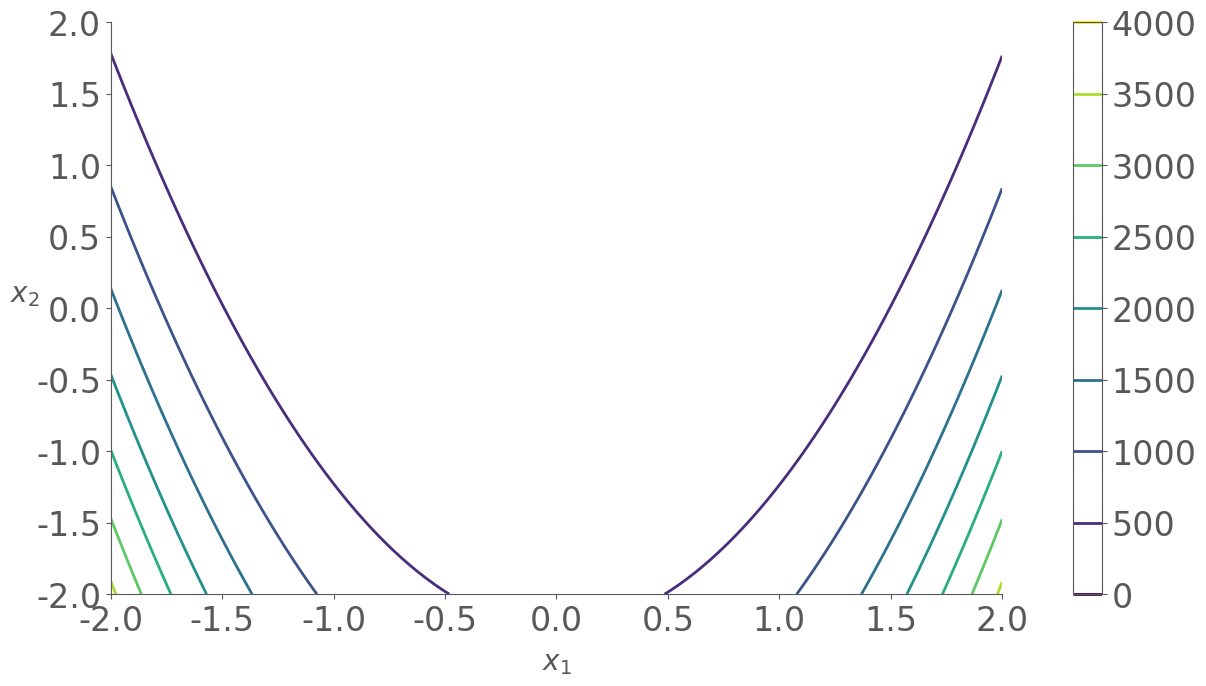

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

# Create the frame
fig, ax = plt.subplots()
X_arr, Y_arr = np.meshgrid(x_arr, y_arr)

# Plot
CP = ax.contour(X_arr, Y_arr, F_arr.T)

# Set axis 
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20, rotation=0)

fig.colorbar(CP)

plt.show()

The issues:
* I1: About half of the figure is empty! Multi-scale data -> use log plot.
* I2: Too many x, y ticks. Are they useful?
* I3: Where is the optimal solution?

#### About the colormap:

The colormap shall match the data type, i.e., sequential data shall be visualized by a sequential colormap and a divergent data shall be visualized using a divergent colormap. A more subtle thing for sequential colormap is that the levels it feels like to human eyes shall be close to actual levels defined in the colormap. This concept is called perceptually uniform colour maps. Check the [here](https://colorcet.com/) and [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) for more details.

##### Example
If we are visualizing aircraft wing stress and buckling, what kind of colormap we shall use?

The answer is stress: divergent and buckling sequential.
Because stress data is divergent: compress and stretch.
But the buckling data is sequential (buckling only happens for structures in compression!).

<img src="strees_buckling.png" alt="drawing" width="600"/>

Figure credit: [Fakhimi et al.](https://link.springer.com/article/10.1007/s11081-021-09672-6)

#### 3.2.2 A better figure

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: CMU Bright


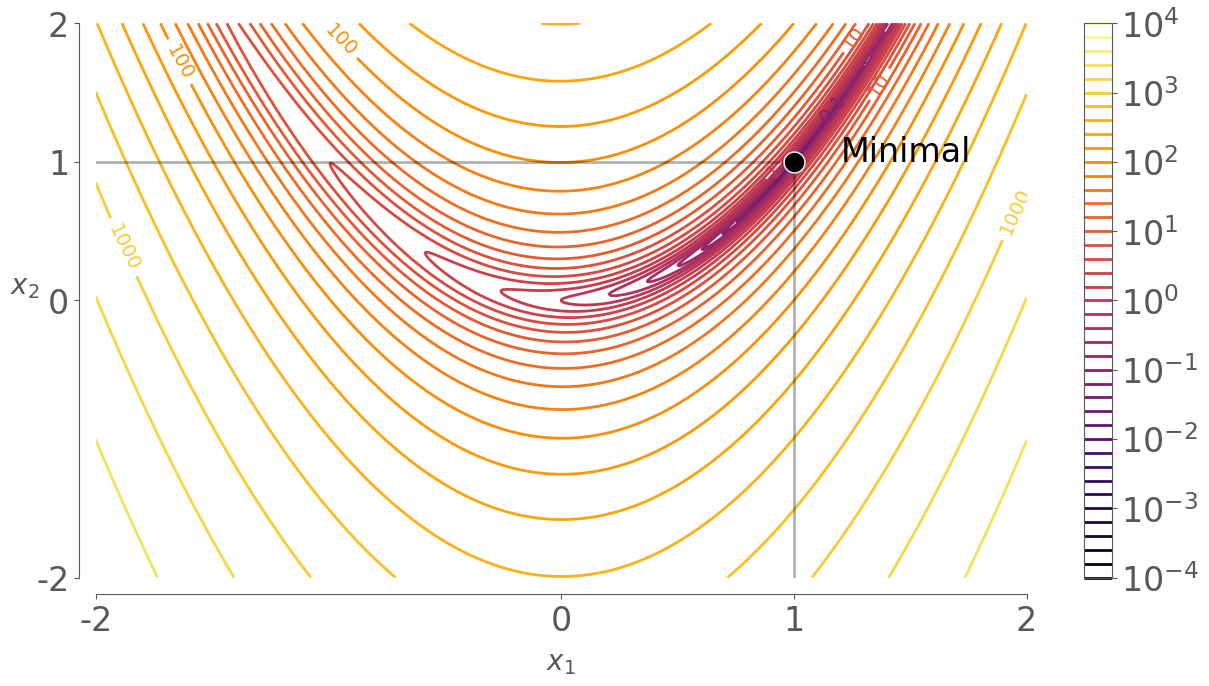

In [7]:
import matplotlib
from matplotlib import ticker, cm
import niceplots


# Create the frame
fig, ax = plt.subplots()
X_arr, Y_arr = np.meshgrid(x_arr, y_arr)

# Load niceplots
niceplots.setRCParams()
niceplots.All()

# Fix (I1)
# Define the contour levels
levels = pow(10, np.linspace(-4, 4, 41))
# The default colormap actually is okay. 
CP = ax.contour(X_arr, Y_arr, F_arr.T, levels, locator=plt.LogLocator(), cmap="inferno")

# Add the label
ax.clabel(CP, levels = [10**-3, 10**-2, 10**-1, 1.0, 10.0, 100.0, 1000.0],  # label every tenth level
                inline=True, fmt = "%1.4g", fontsize=14)

# Set axis 
ax.set_xlabel(r'$x_1$', fontsize=20)
ax.set_ylabel(r'$x_2$', fontsize=20, rotation=0)

# Format the colorbar
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(b)

fig.colorbar(CP, format=ticker.FuncFormatter(fmt))

# Redefine the axis ticks (I2)
ax.set_xticks([-2, 0, 1, 2], [-2, 0, 1, 2])
ax.set_yticks([-2, 0, 1, 2], [-2, 0, 1, 2])

# Auxcillary lines (I3)
ax.plot([-2, 1], [1, 1], 'k', alpha = 0.3)
ax.plot([1, 1], [-2, 1], 'k', alpha = 0.3)
ax.plot([1], [1], "ko", markersize = 15)

ax.text(1.2, 1, "Minimal", color = 'k')

plt.show()

# plt.savefig('../doc/figures/example_swept_ae.pdf',bbox_inches='tight')

## Advanced topics